In [1]:
import os
import requests
import pandas as pd
import numpy as np
import datetime
import glob
from matplotlib import pyplot as plt


In [70]:
df = pd.read_excel("fulldata.xlsx")
df = df.set_index('date_time')

In [97]:
test = df[df.index.str.match('20211106.*')]

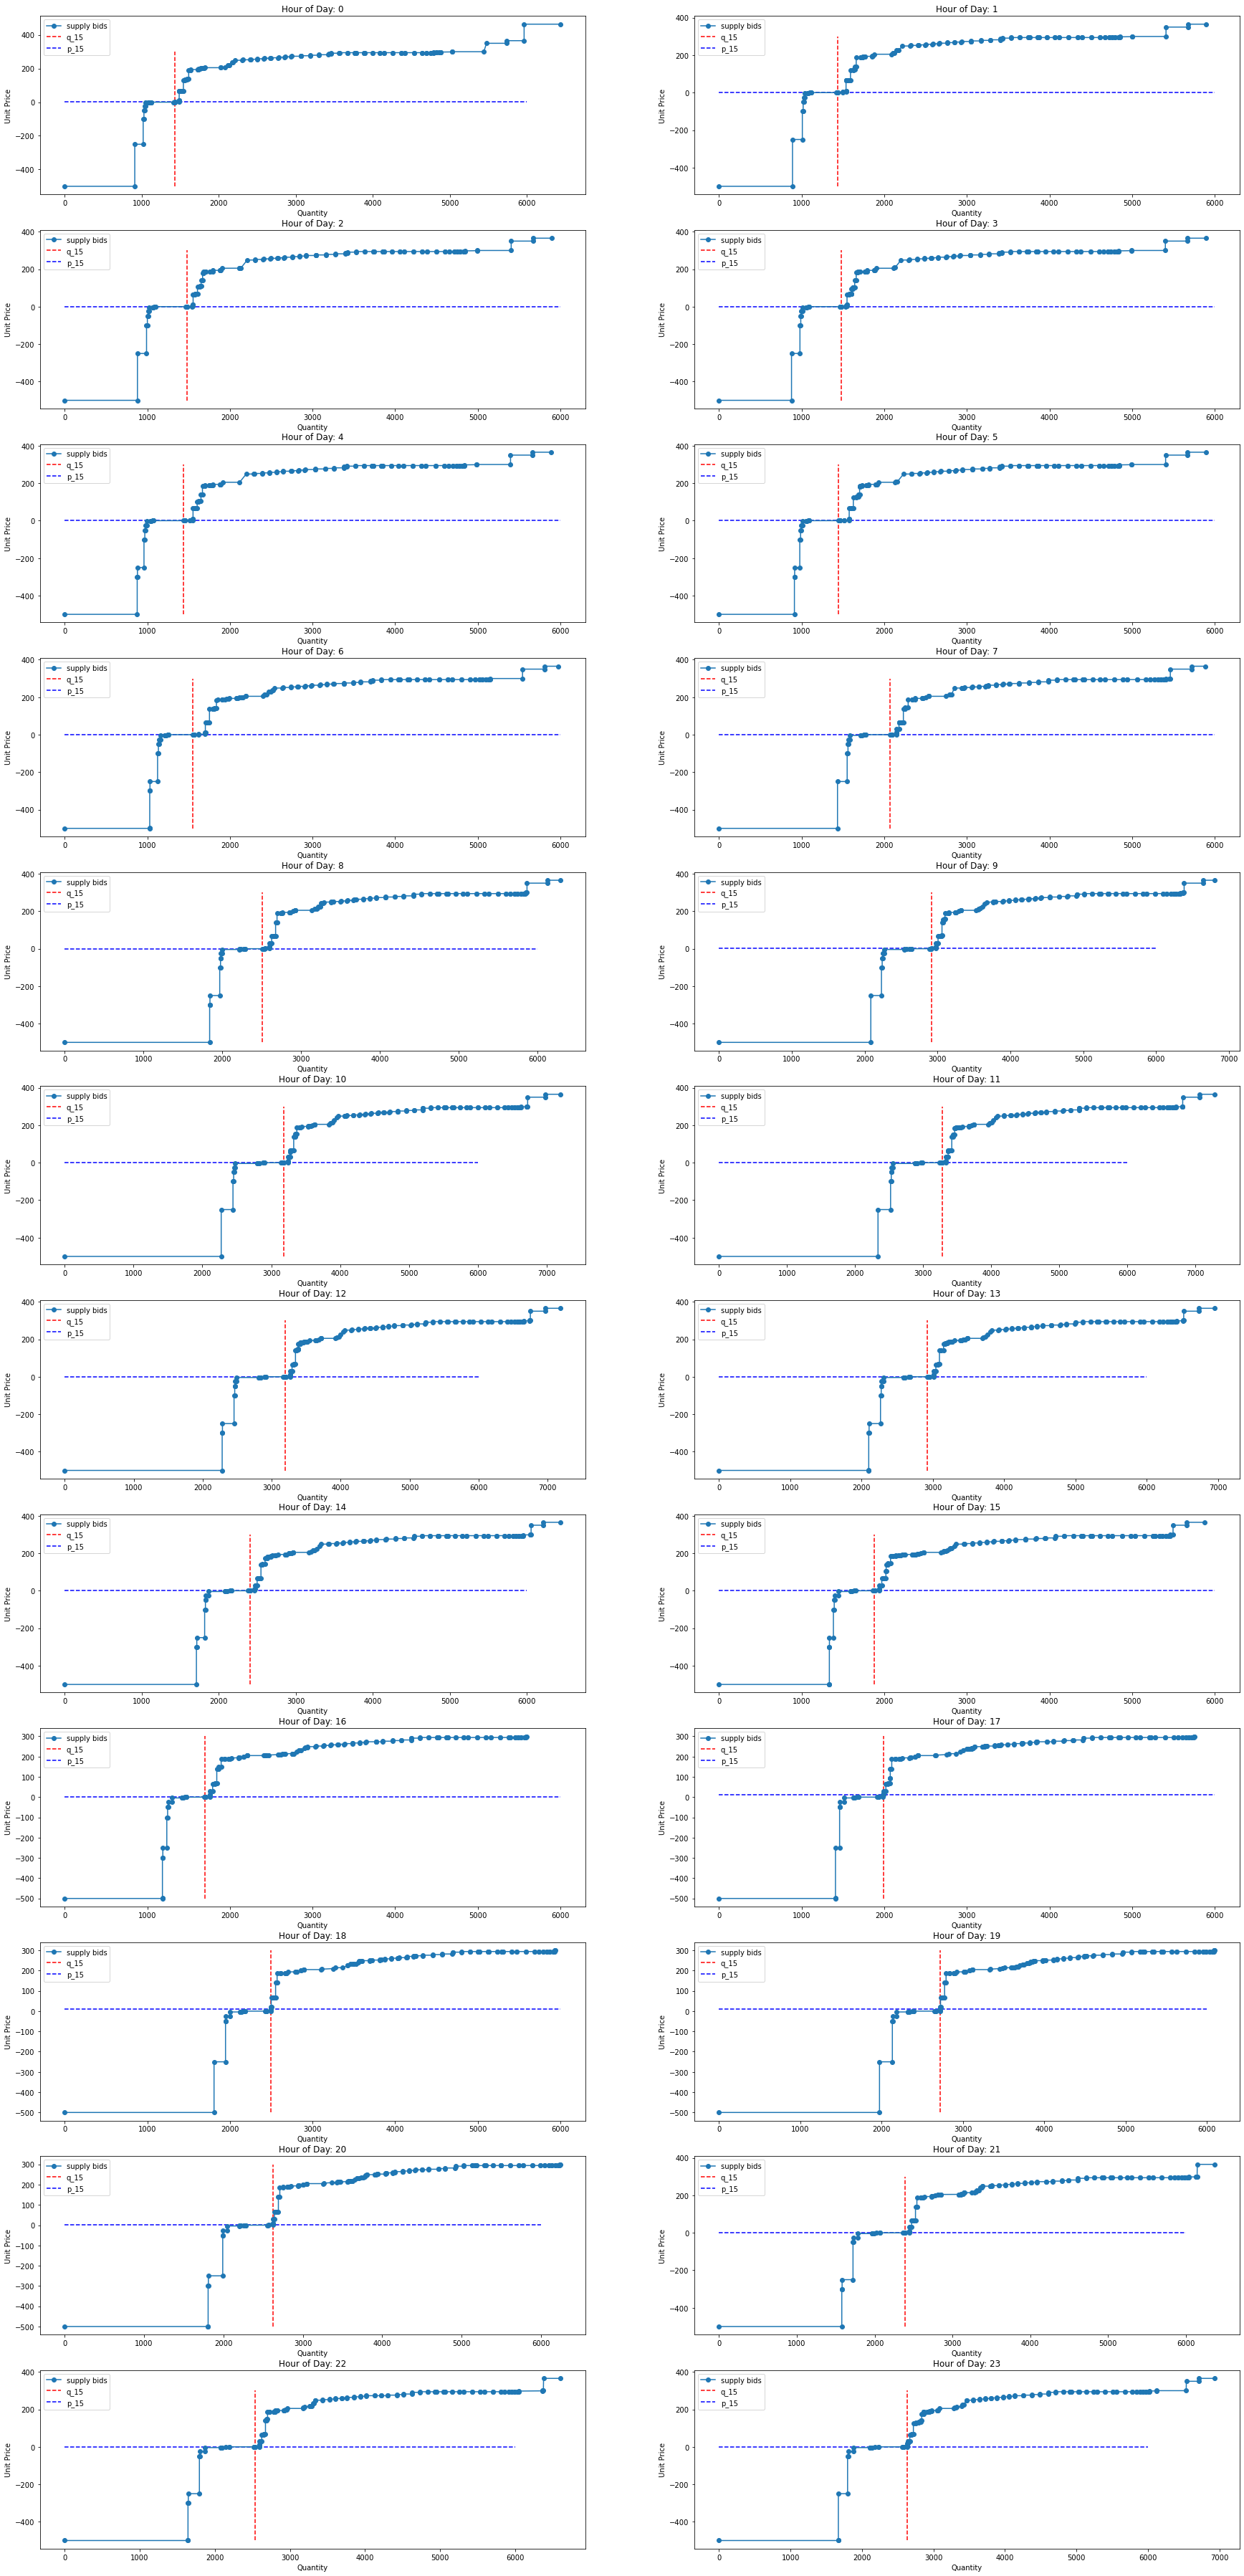

In [111]:
unitprice = test['UNITPRICE']

COL_NUM = 2
ROW_NUM = 12
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(30,65))

for i in range(24):
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    
    price = test['UNITPRICE'].iloc[i].strip('][').split(', ')
    price = [float(x) for x in price]
    quantity = test['QUANTITY'].iloc[i].strip('][').split(', ')
    quantity = [float(x) for x in quantity]
    
    ax.plot(quantity[:-3], price[:-3], '-o', label = 'supply bids')
    ax.vlines(test['q_15'].iloc[i], -500, 300, linestyles='dashed', colors='red', label = 'q_15')
    ax.hlines(test['p_15'].iloc[i], 0, 6000, linestyles='dashed', colors='blue', label = 'p_15')
    ax.set_xlabel("Quantity")
    ax.set_ylabel("Unit Price")
    ax.legend()
    ax.set_title("Hour of Day: " + str(i))
plt.savefig('q_15 p_15.png')

In [99]:
df['q_15'].describe()

count    2304.000000
mean     3385.864879
std      1103.535000
min       971.527500
25%      2589.264950
50%      3346.852000
75%      4143.414750
max      6806.132800
Name: q_15, dtype: float64

In [80]:
df.columns = [col.replace(' ', '_') for col in df.columns]

In [81]:

import statsmodels.formula.api as smf
# results = smf.ols('q_15 ~ RES_forecast+ Load_forecast+Mandatory_Hydro+ Residual_Load+ avai_lignite+ avai_natural_gas+ avai_hydro+ Residual_Load_Diff', data = df).fit()
results = smf.ols('q_15 ~ RES_forecast + Mandatory_Hydro', data = df).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   q_15   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 3.429e+04
Date:                Mon, 02 May 2022   Prob (F-statistic):               0.00
Time:                        15:24:27   Log-Likelihood:                -15462.
No. Observations:                2304   AIC:                         3.093e+04
Df Residuals:                    2301   BIC:                         3.095e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         913.8269     10.355     88.251      0.000     893.521     934.133
RES_forecast        0.9670      0.004    220.555      0.000       0.958       0.976
Mandatory_Hydro     0.9912      0.008    132.066      0.000       0.977       1.006
==============================================================================
Omnibus:                      280.495   Durbin-Watson:                   0.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              510.641
Skew:                           0.791   Prob(JB):                    1.31e-111
Kurtosis:                       4.677   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## See if residual_load_diff changes through out the day

In [85]:
def plot_Residual_Load_Diff_through_day(i):
    import matplotlib.pyplot as plt
    y = df[(df.index >= df.iloc[i*24].name) & (df.index < df.iloc[(i+1)*24].name)]['Residual_Load_Diff']
    x = [h for h in range(24)]
    plt.plot(x,y,'-o')
    day = df.iloc[i*24].name[:-6]
    plt.title('Residual_Load_Diff vs. Hour  |  Day: ' + str(day))
    plt.xlabel('Hour')
    plt.ylabel('Residual_Load_Diff')
#     plt.xticker()
    plt.xticks(np.arange(0, 24, step=1))
    plt.show()

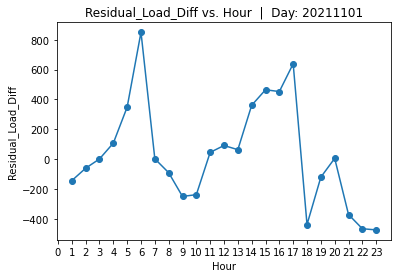

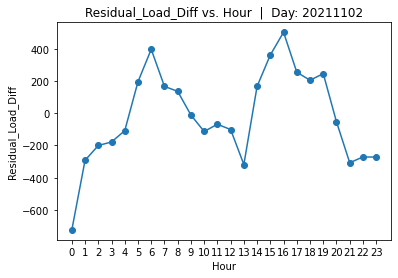

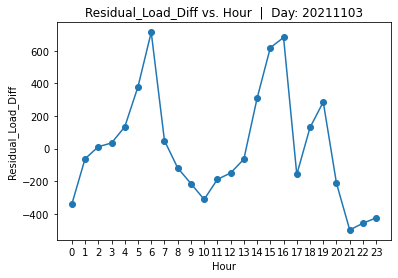

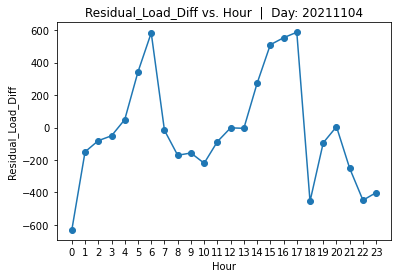

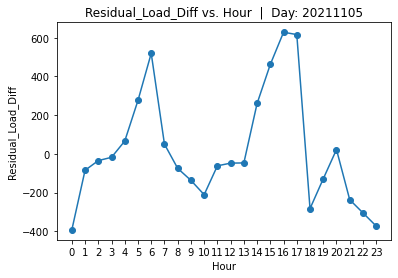

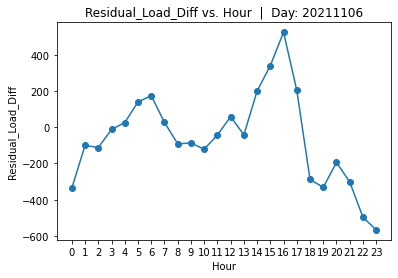

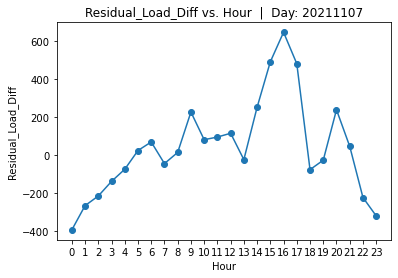

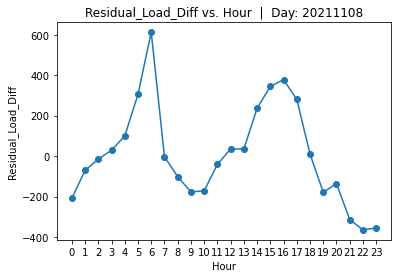

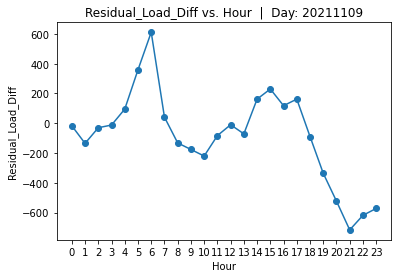

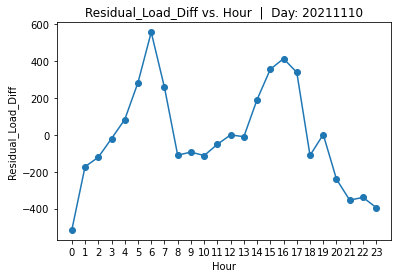

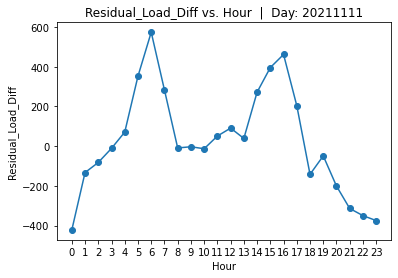

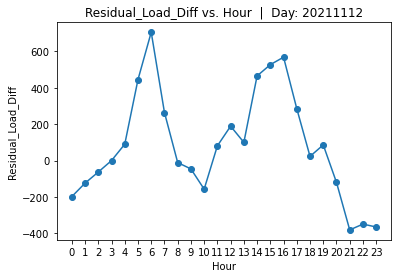

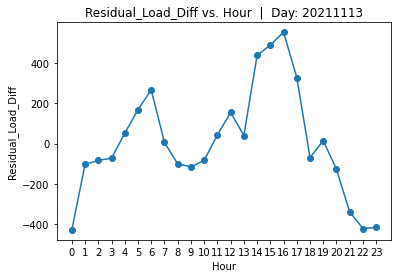

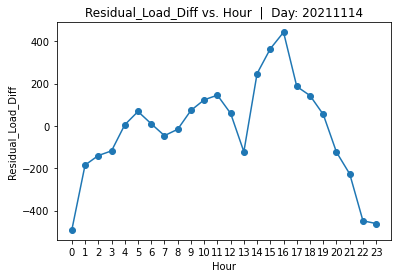

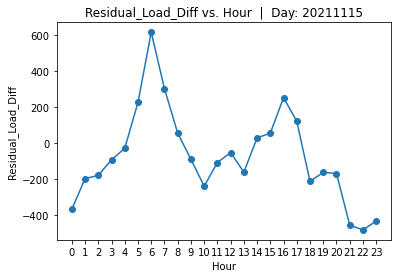

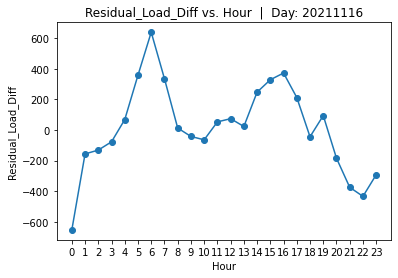

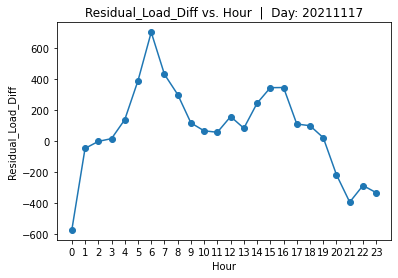

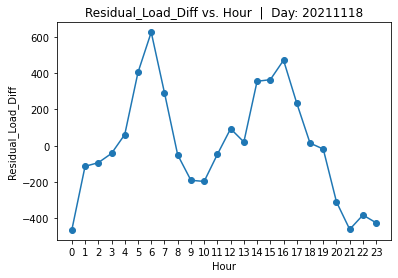

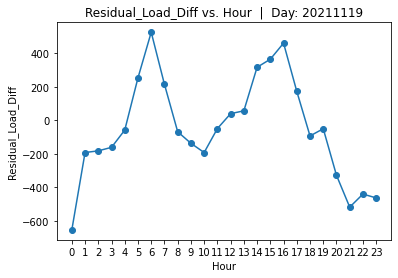

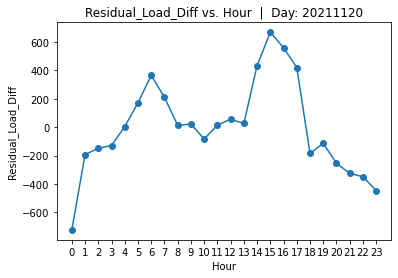

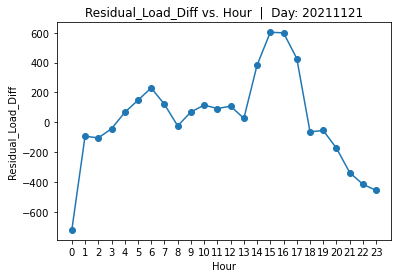

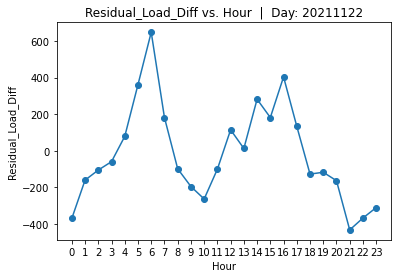

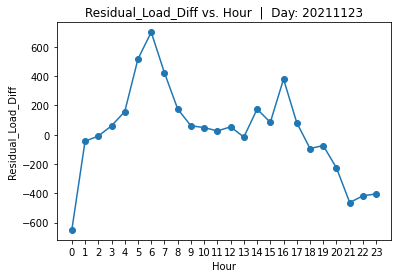

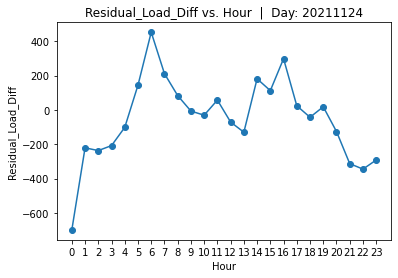

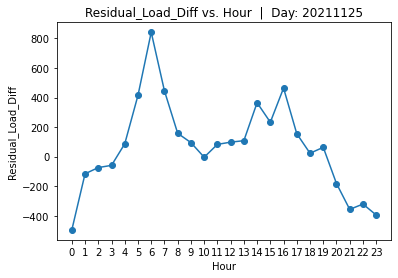

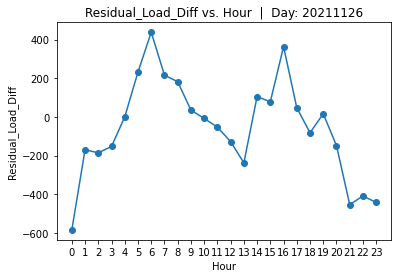

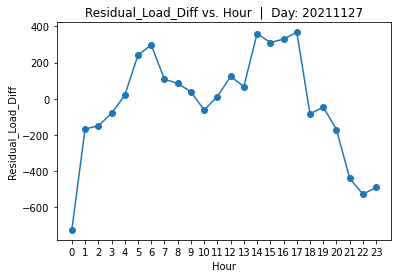

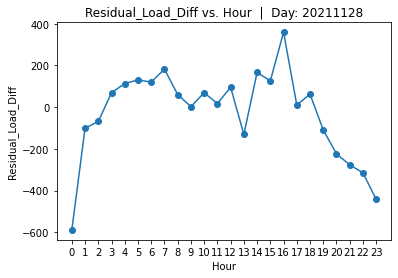

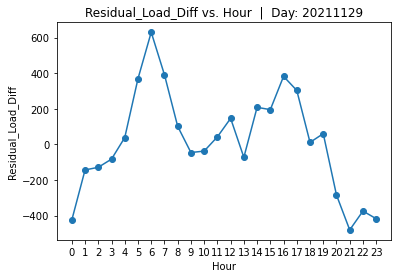

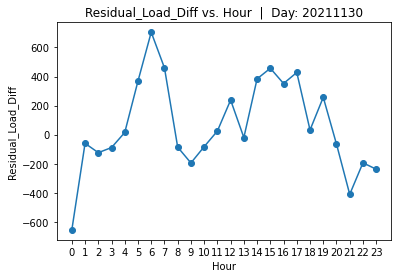

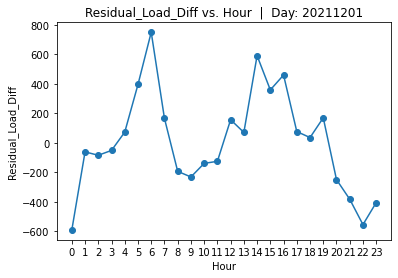

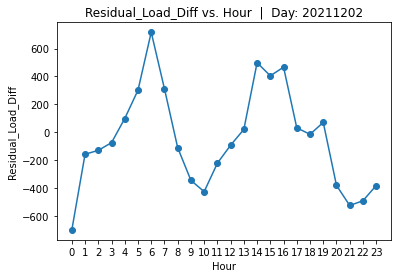

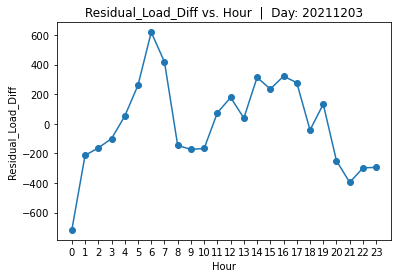

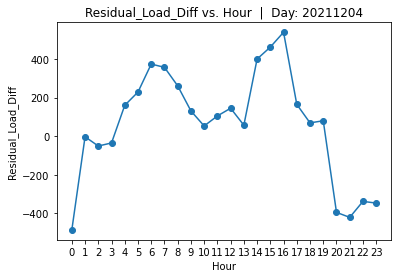

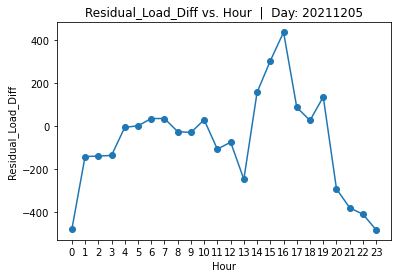

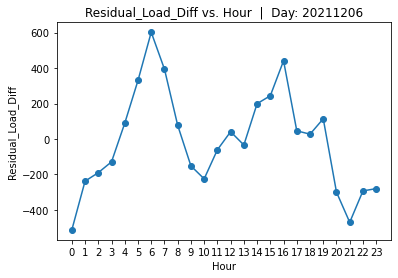

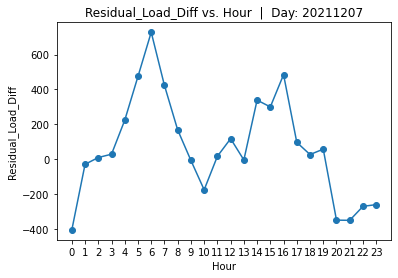

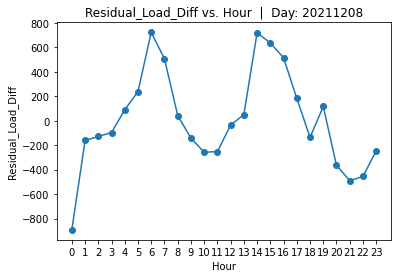

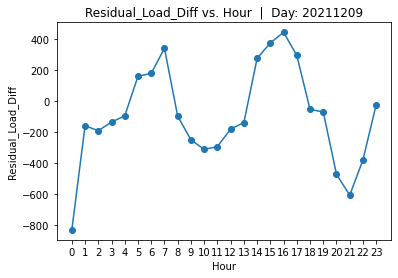

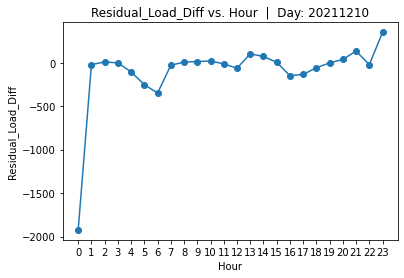

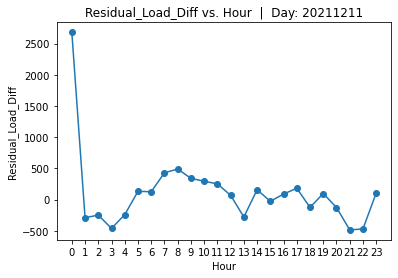

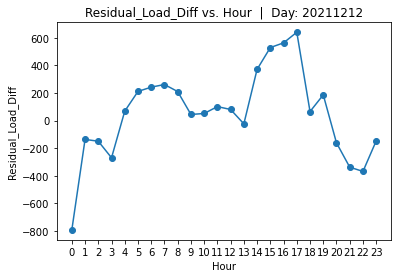

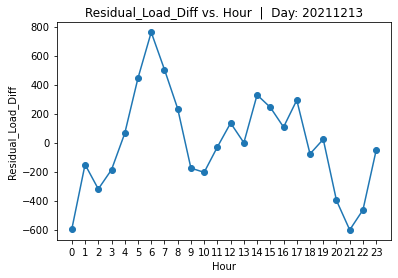

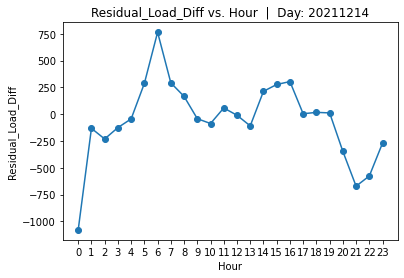

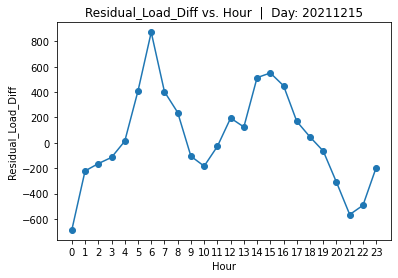

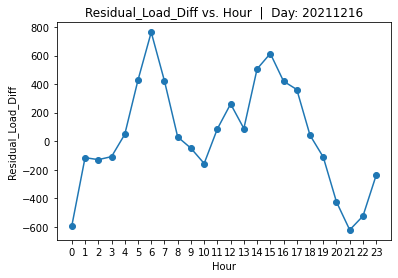

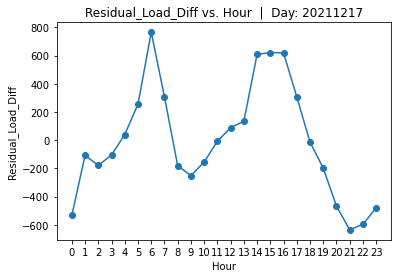

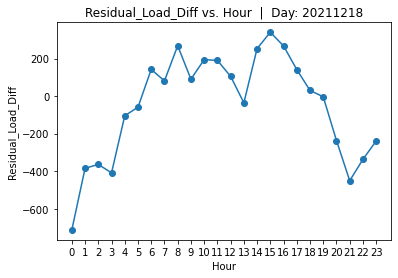

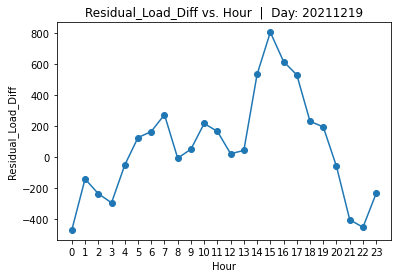

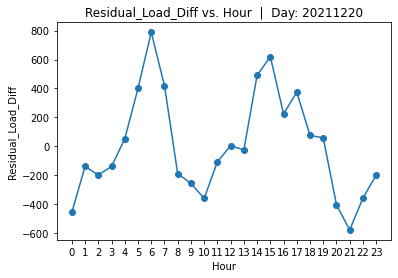

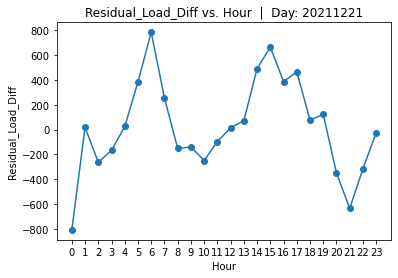

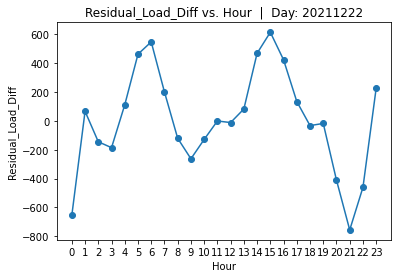

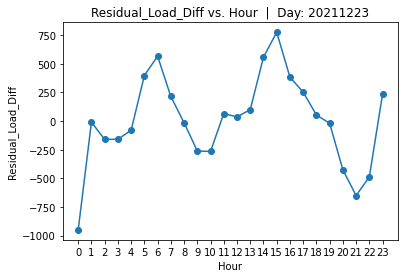

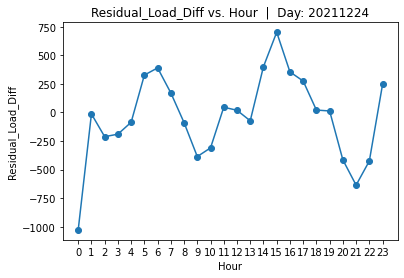

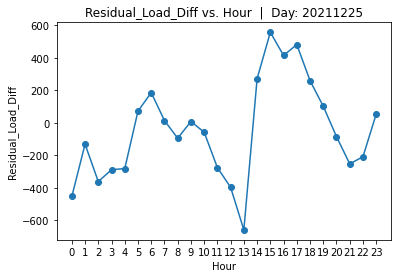

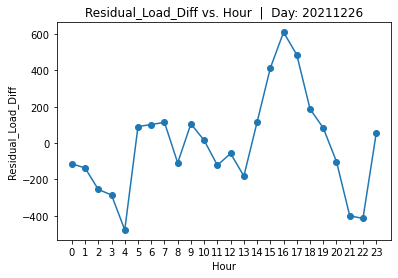

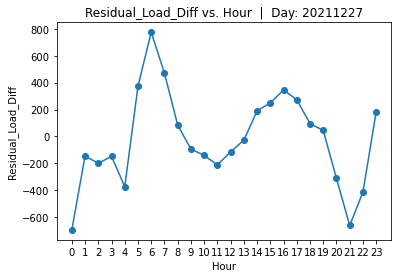

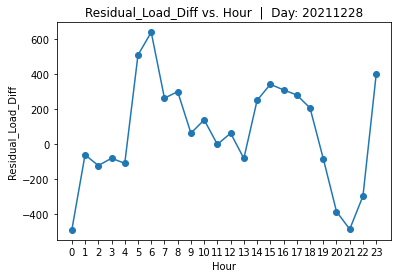

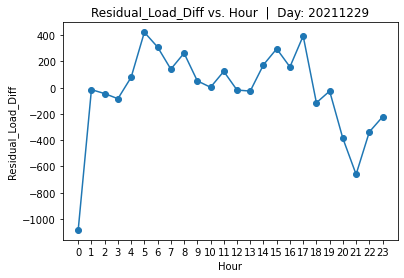

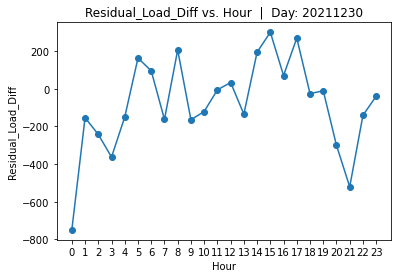

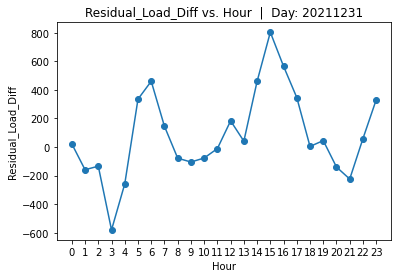

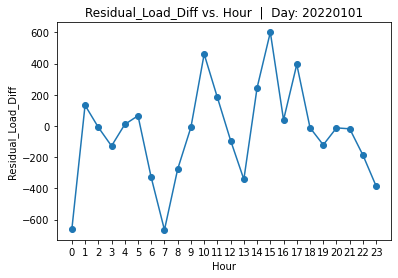

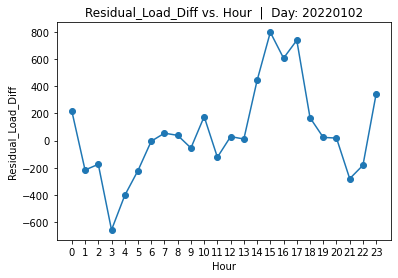

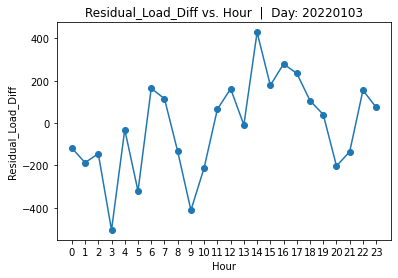

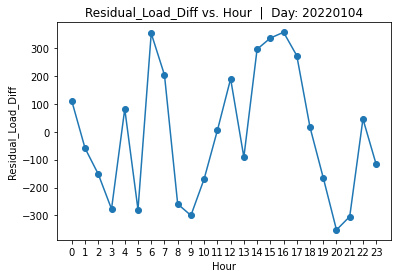

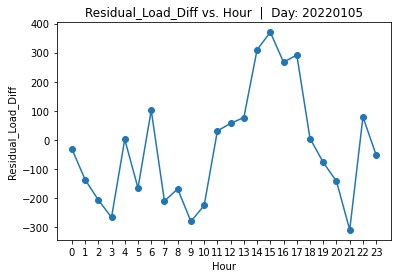

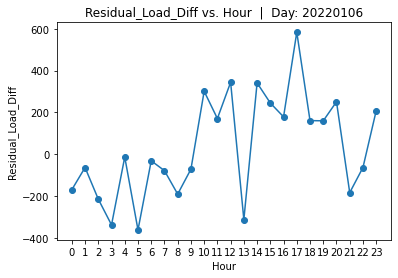

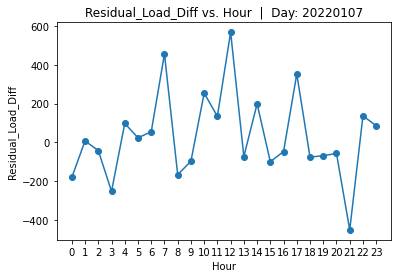

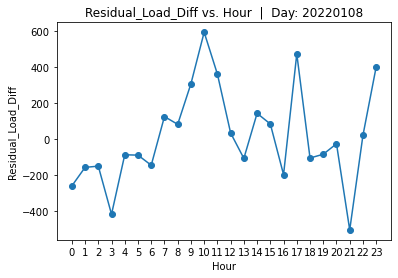

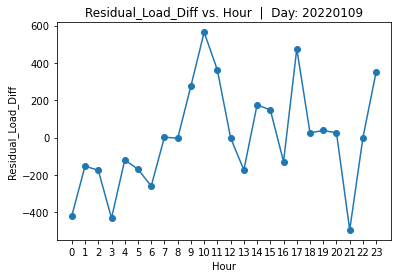

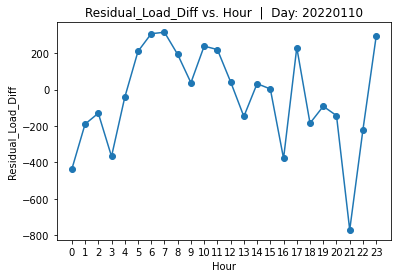

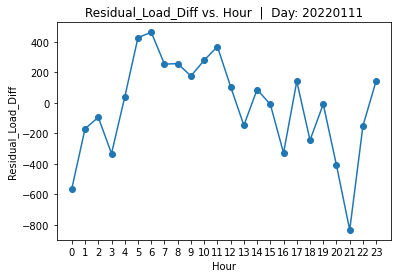

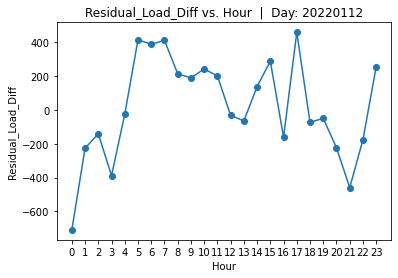

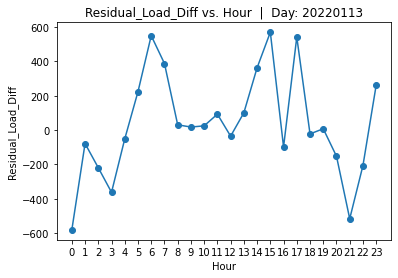

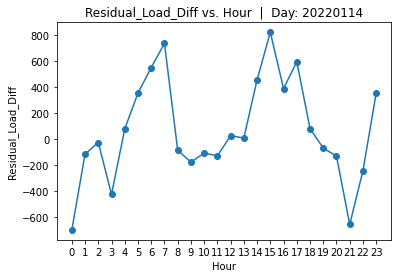

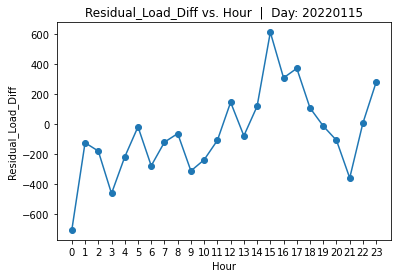

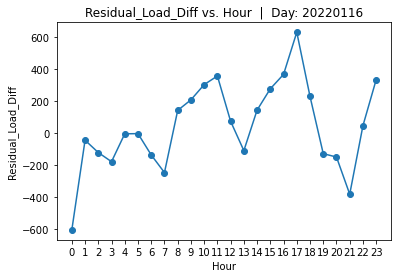

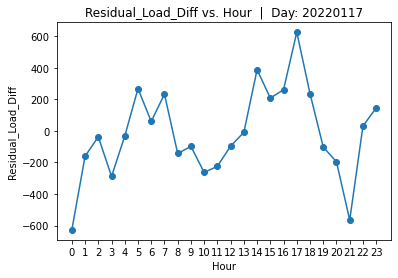

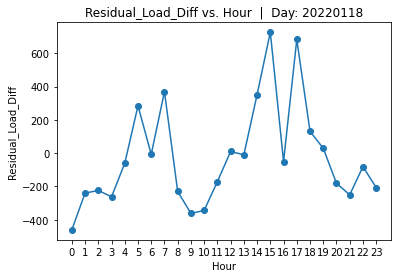

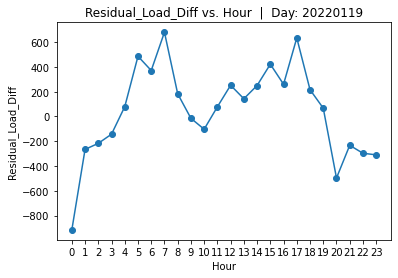

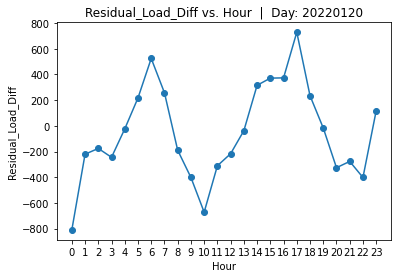

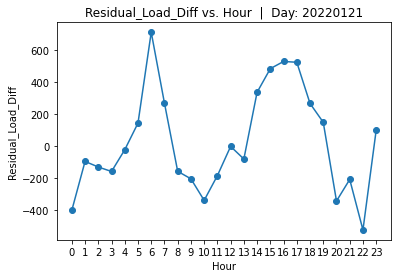

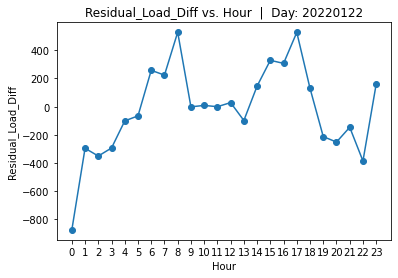

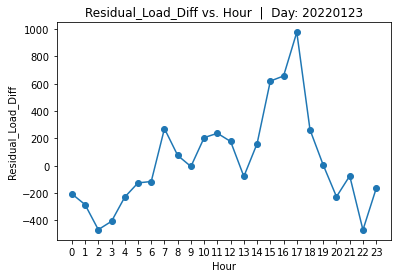

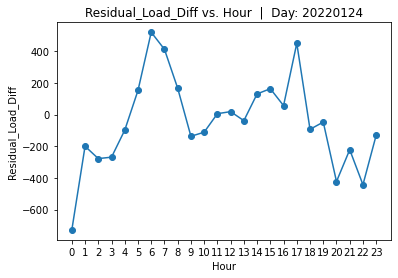

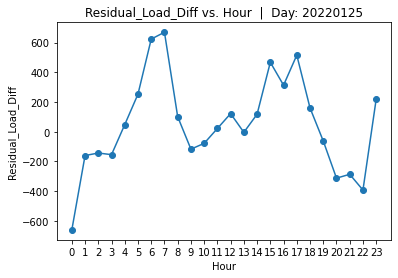

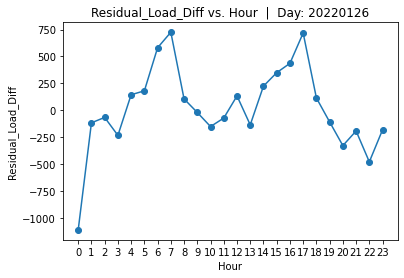

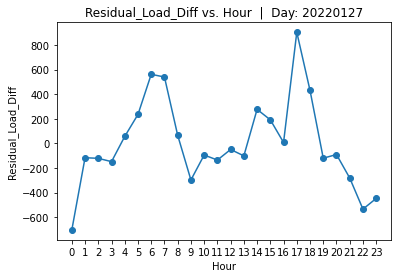

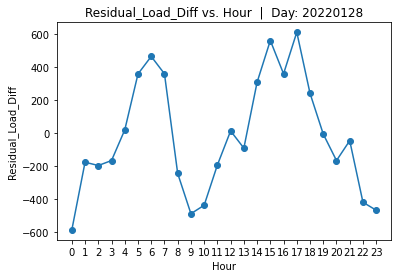

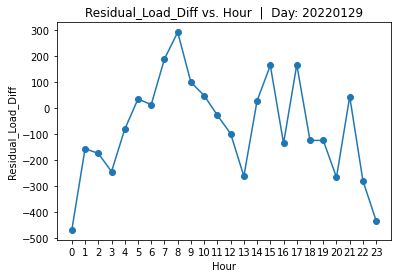

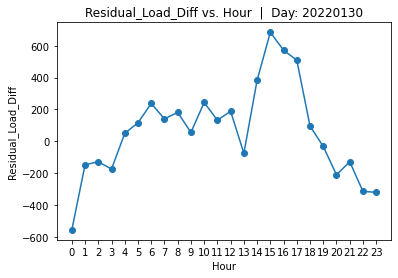

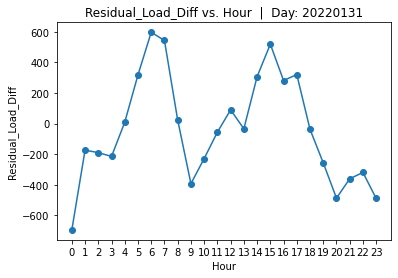

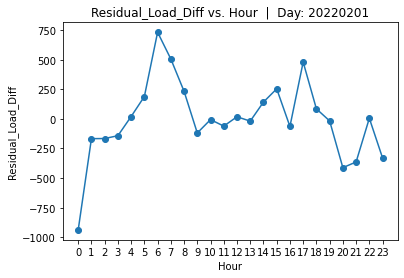

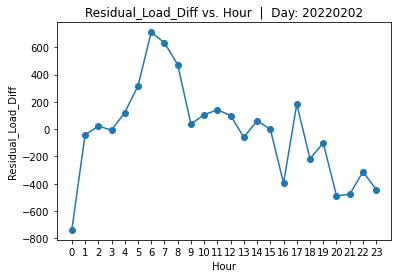

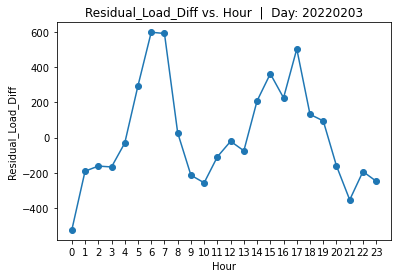

IndexError: single positional indexer is out-of-bounds

In [86]:
for i in range(96):
    plot_Residual_Load_Diff_through_day(i)